In [25]:
import numpy as np
import pandas as pd
import os

In [26]:
train_df = pd.read_csv('insurance.csv')
train_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [27]:
train_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [29]:
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [30]:
train_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [31]:
categorical_cols = train_df.select_dtypes(include = 'object').columns
train_df[categorical_cols] = train_df[categorical_cols].astype('string')
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [32]:
train_df['sex'].dtype

string[python]

In [33]:
numerical_cols = train_df.select_dtypes(include = np.number).columns
numerical_cols

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [34]:
train_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [36]:
categorical_cols,numerical_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'expenses'], dtype='object'))

In [37]:
train_df.sex.value_counts()/len(train_df.sex)

male      0.505232
female    0.494768
Name: sex, dtype: Float64

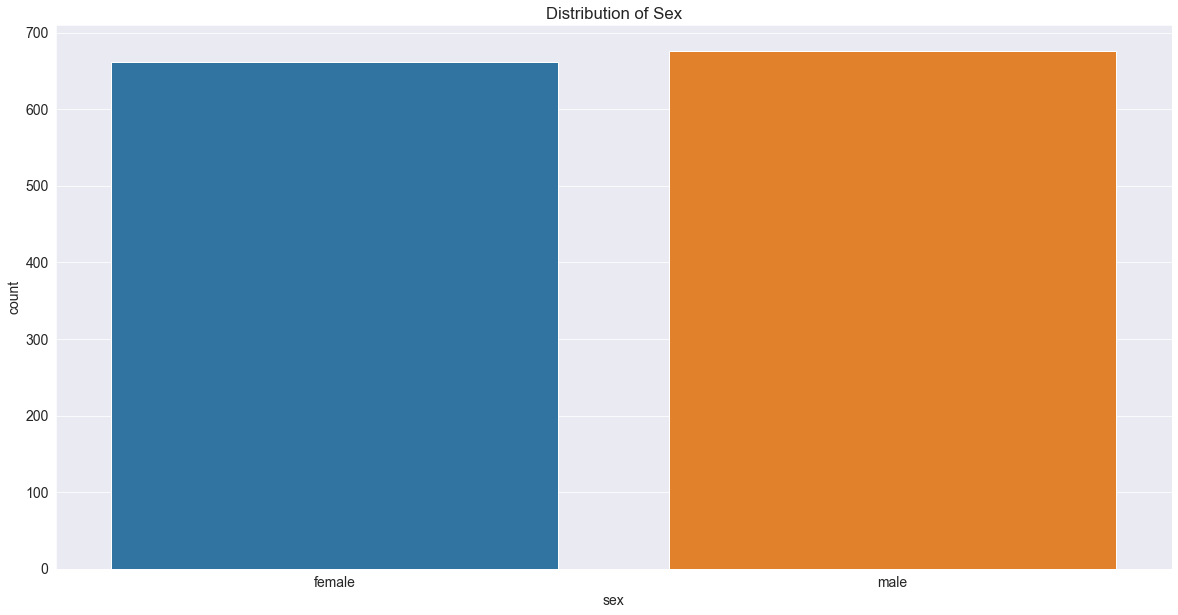

In [38]:
sns.countplot(x = 'sex', data = train_df).set(title = 'Distribution of Sex');

In [39]:
train_df[['smoker']]

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [40]:
train_df.smoker.value_counts()/len(train_df.smoker)

no     0.795217
yes    0.204783
Name: smoker, dtype: Float64

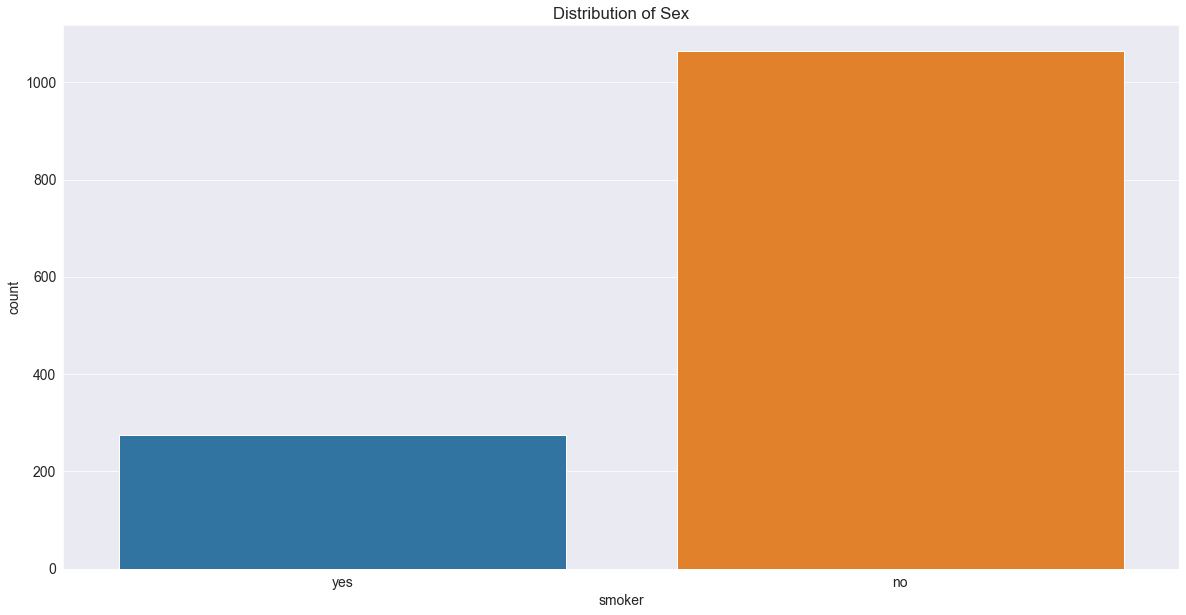

In [41]:
sns.countplot(x = train_df.smoker).set(title = 'Distribution of Sex');

In [42]:
yes = train_df[train_df.smoker == 'yes'].smoker.value_counts()/len(train_df.smoker)
no = train_df[train_df.smoker == 'no'].smoker.value_counts()/len(train_df.smoker)

In [43]:
train_df.region


0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: string

In [44]:
train_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: Int64

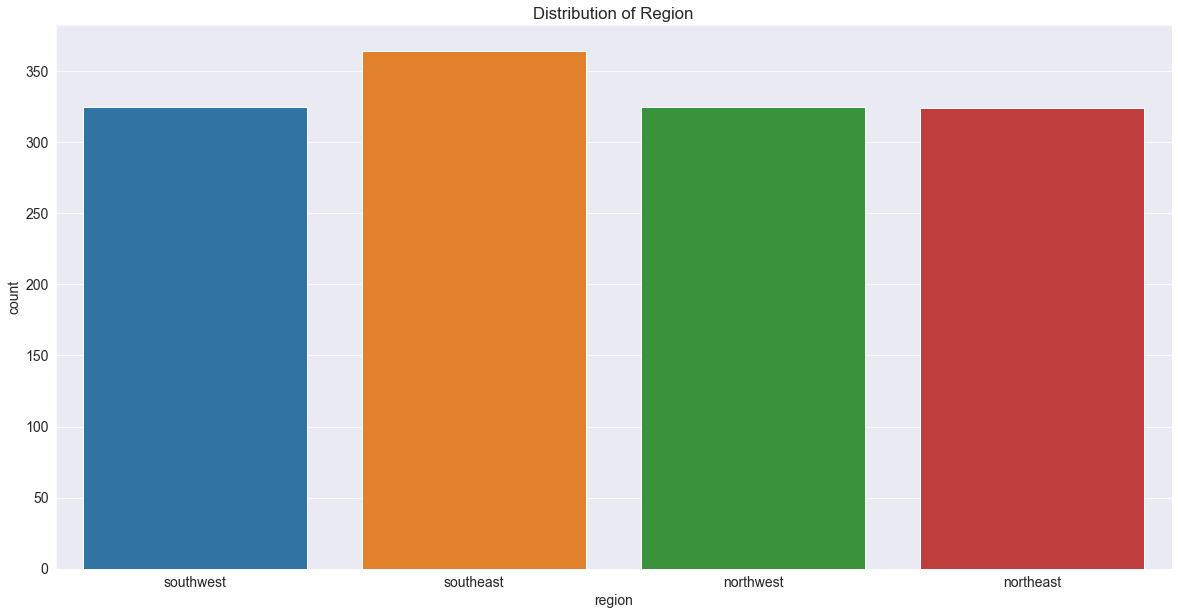

In [45]:
sns.countplot(x = train_df.region).set(title = 'Distribution of Region');

In [46]:
len(train_df.age.unique().tolist())

47

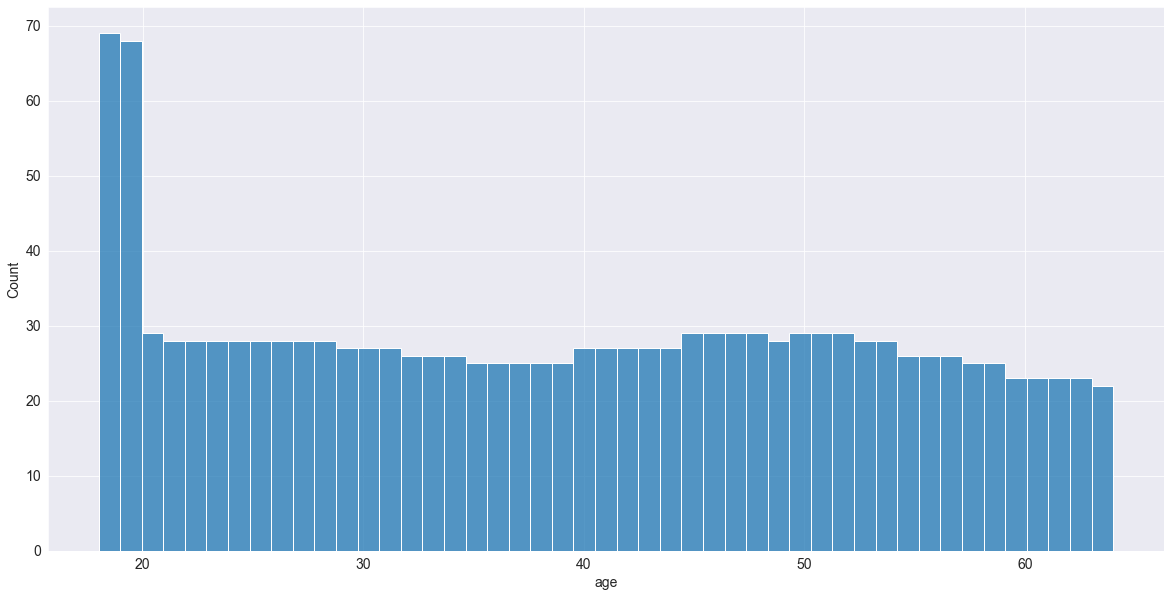

In [47]:
sns.histplot(x = train_df.age, bins = 47);

In [48]:
train_df.bmi

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64

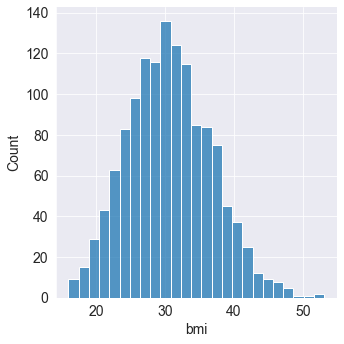

In [49]:
sns.displot(x = train_df.bmi);

In [50]:
train_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

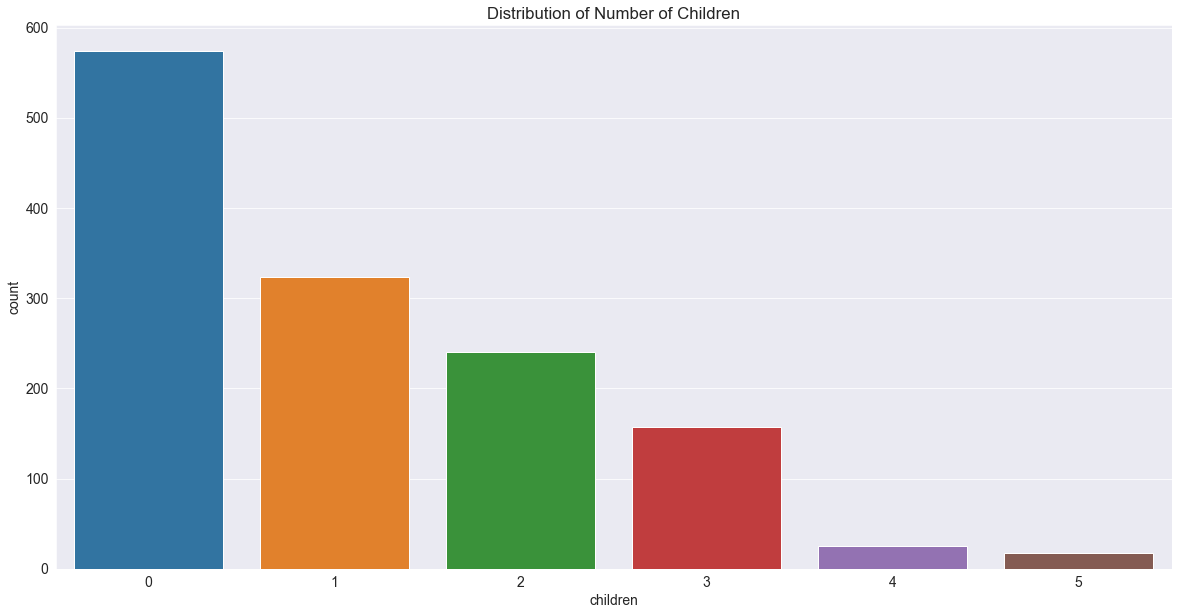

In [51]:
sns.countplot(x = train_df.children).set(title = 'Distribution of Number of Children');

In [52]:
zero = train_df[train_df.children == 0].children.value_counts()/len(train_df.children)
one = train_df[train_df.children == 1].children.value_counts()/len(train_df.children)
two = train_df[train_df.children == 2].children.value_counts()/len(train_df.children)
three = train_df[train_df.children == 3].children.value_counts()/len(train_df.children)
four = train_df[train_df.children == 4].children.value_counts()/len(train_df.children)
five = train_df[train_df.children == 5].children.value_counts()/len(train_df.children)

In [53]:
train_df.expenses

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

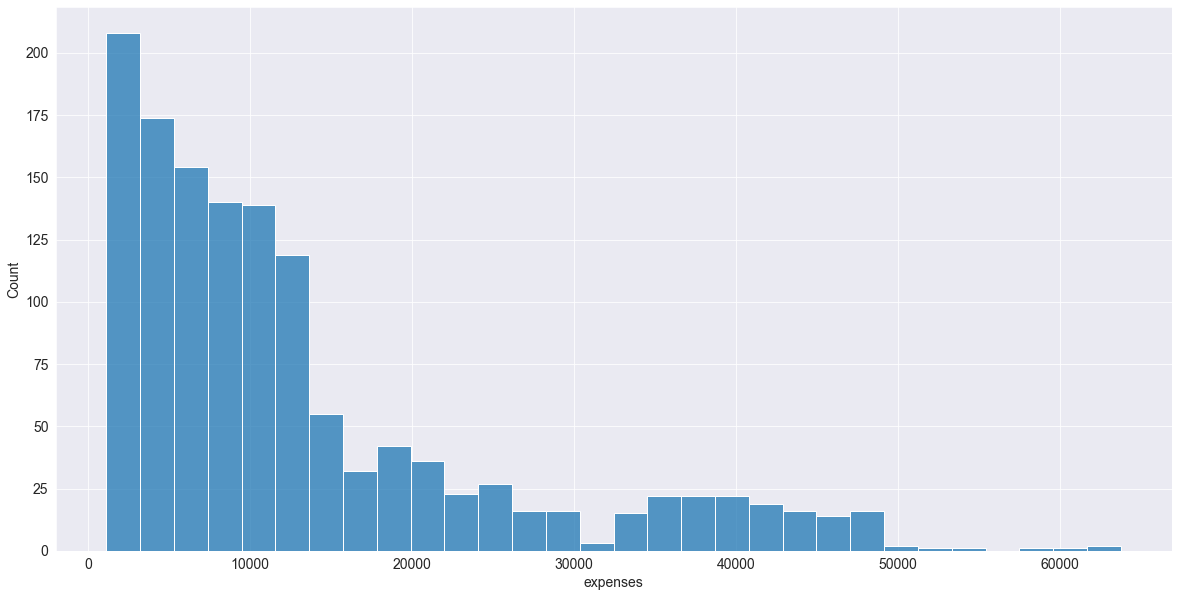

In [54]:
sns.histplot(x = train_df.expenses, bins = 30);

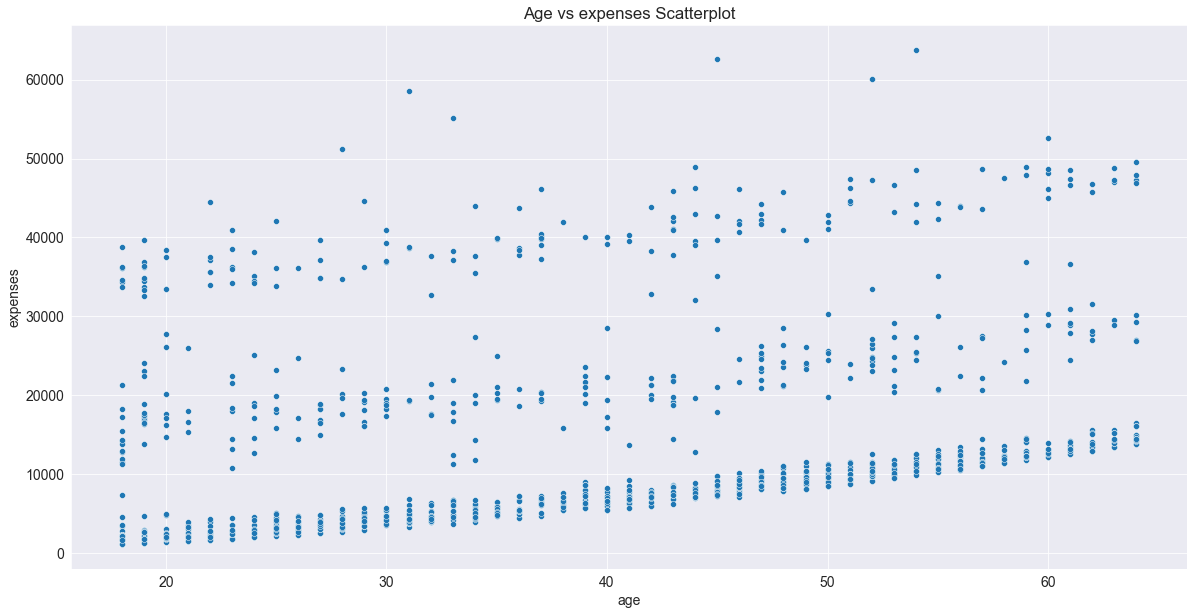

In [55]:
sns.scatterplot(x = 'age', y = 'expenses', data = train_df).set(title = "Age vs expenses Scatterplot");

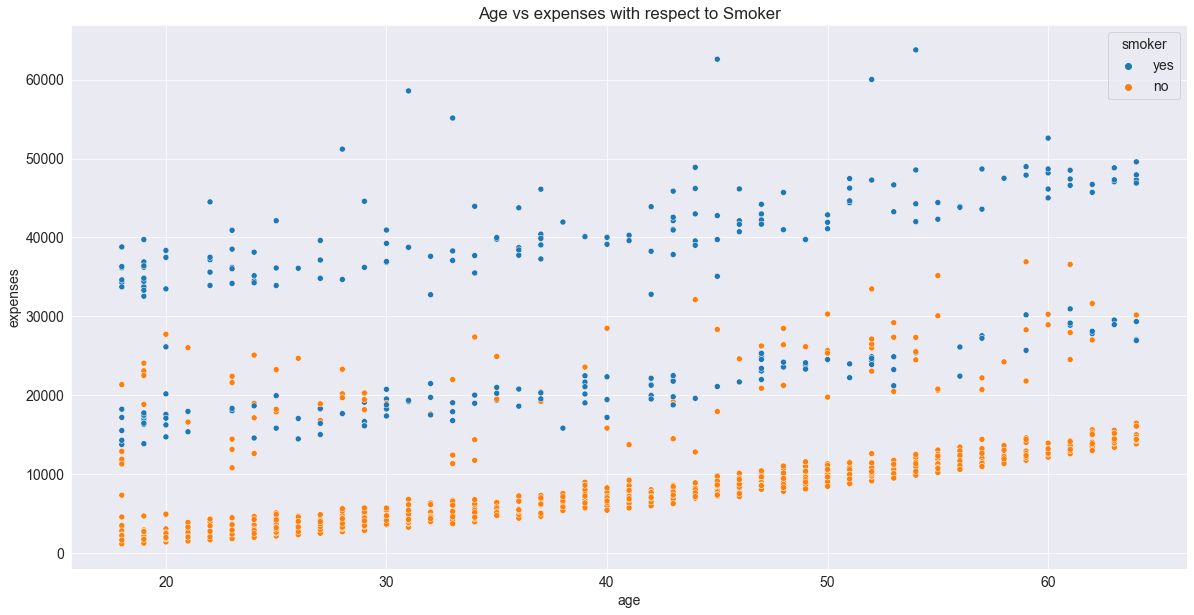

In [56]:
sns.scatterplot(x = 'age', y = 'expenses', hue = 'smoker', data = train_df).set(title = "Age vs expenses with respect to Smoker");

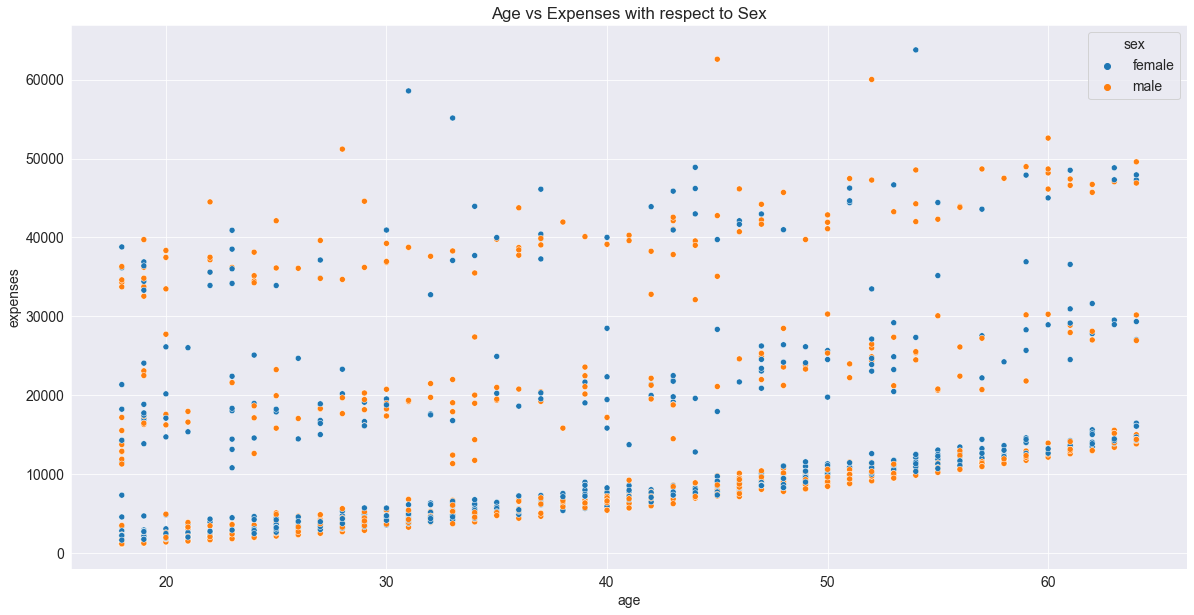

In [57]:
sns.scatterplot(x = 'age', y = 'expenses', hue = 'sex', data = train_df).set(title = "Age vs Expenses with respect to Sex");

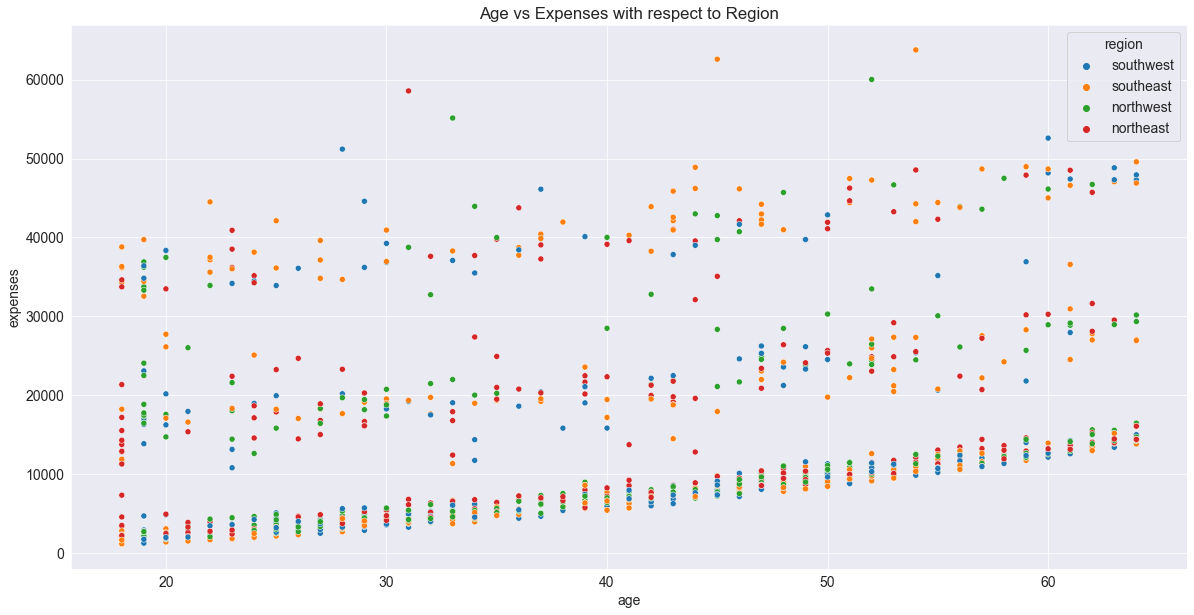

In [58]:
sns.scatterplot(x = 'age', y = 'expenses', hue = 'region', data = train_df).set(title = "Age vs Expenses with respect to Region");

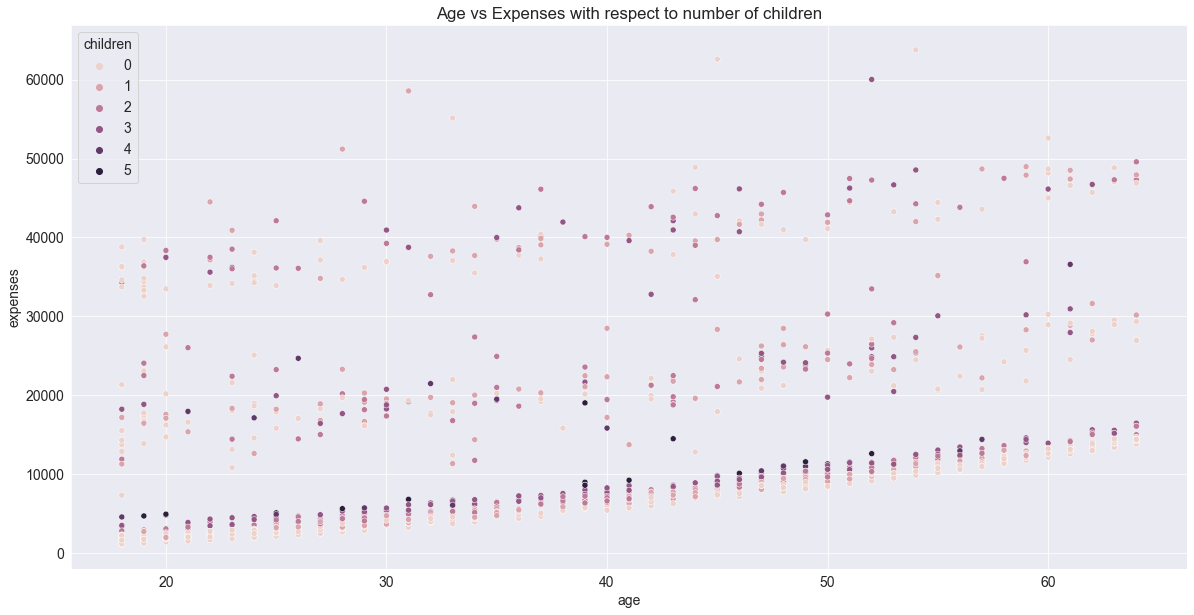

In [59]:
sns.scatterplot(x = 'age', y = 'expenses', hue = 'children', data = train_df).set(title = "Age vs Expenses with respect to number of children");

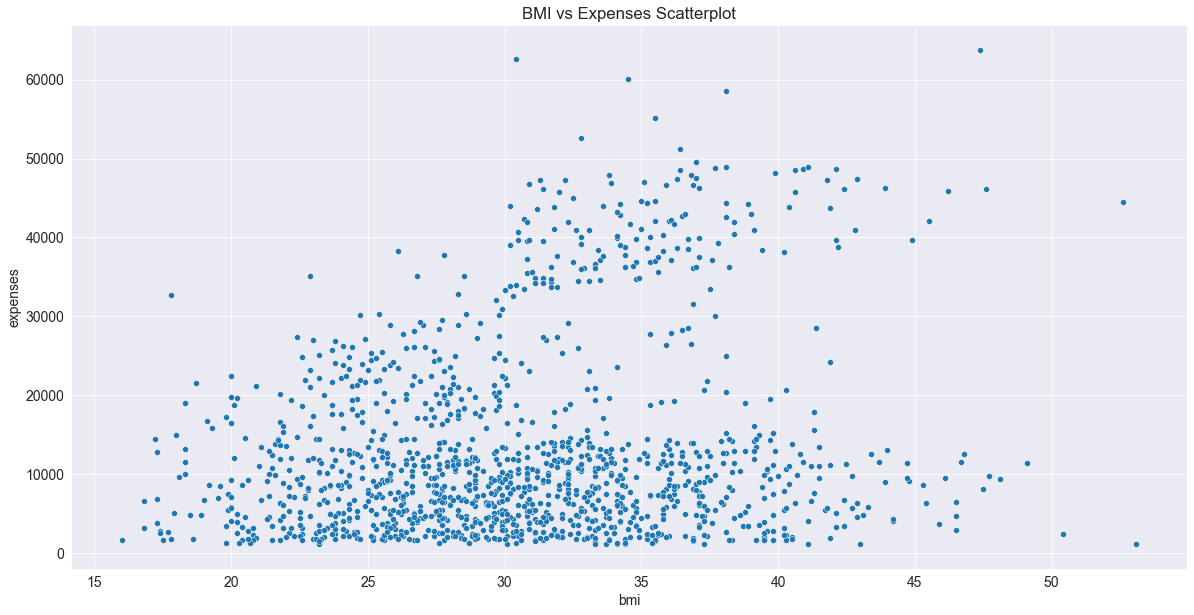

In [60]:
sns.scatterplot(x = 'bmi', y = 'expenses', data = train_df).set(title = 'BMI vs Expenses Scatterplot');

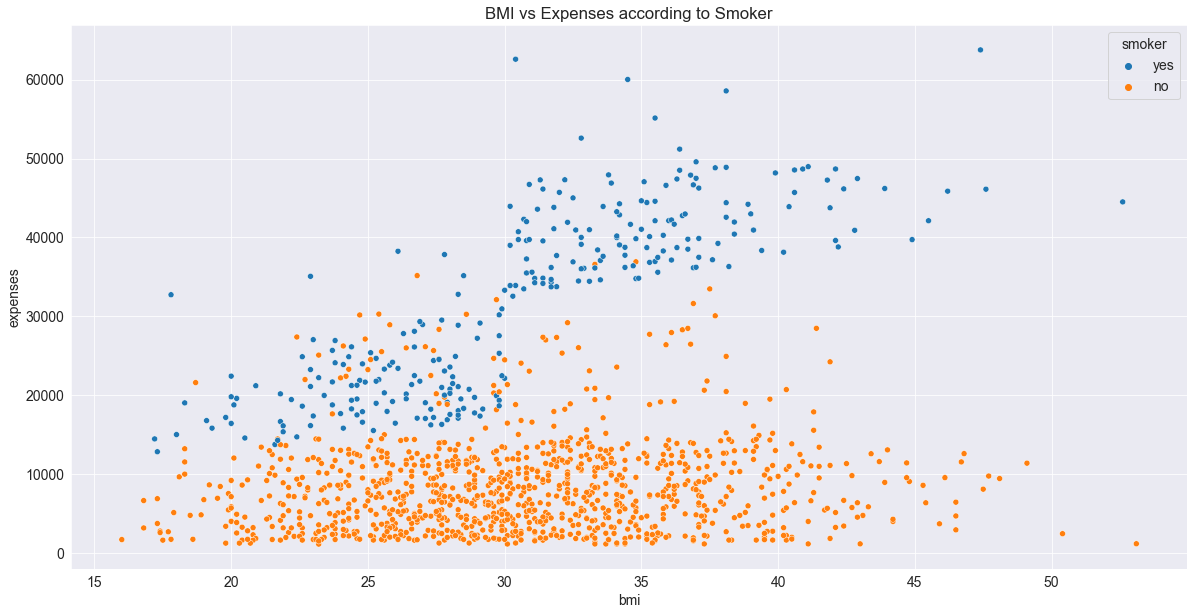

In [61]:
sns.scatterplot(x = 'bmi', y = 'expenses', hue = 'smoker', data = train_df).set(title = 'BMI vs Expenses according to Smoker');

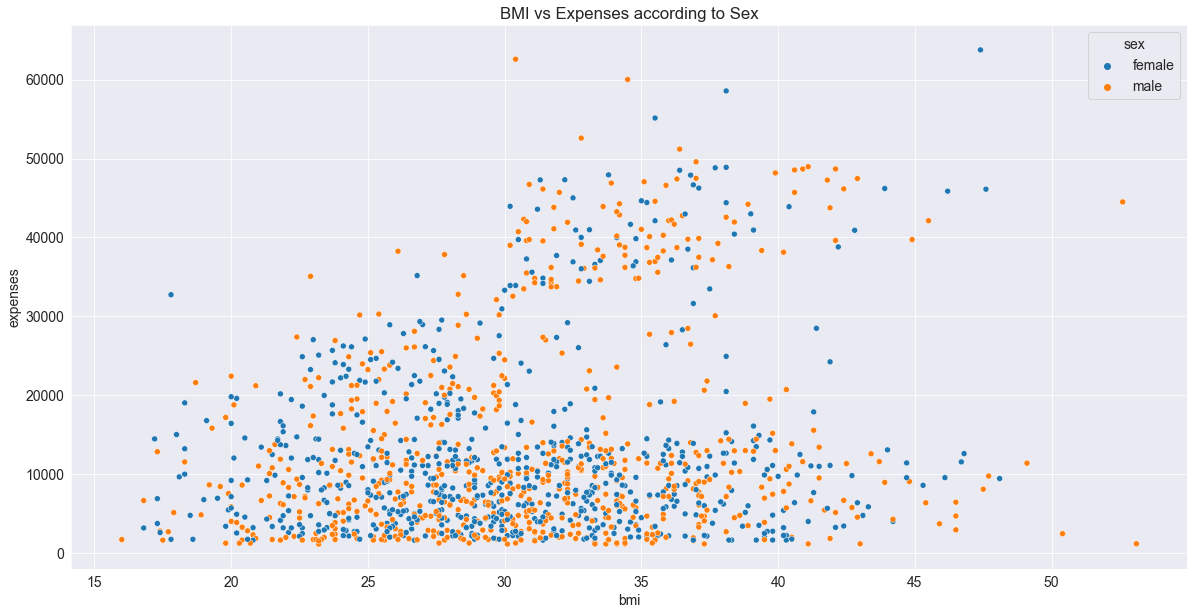

In [62]:
sns.scatterplot(x = 'bmi', y = 'expenses', hue = 'sex', data = train_df).set(title = 'BMI vs Expenses according to Sex');

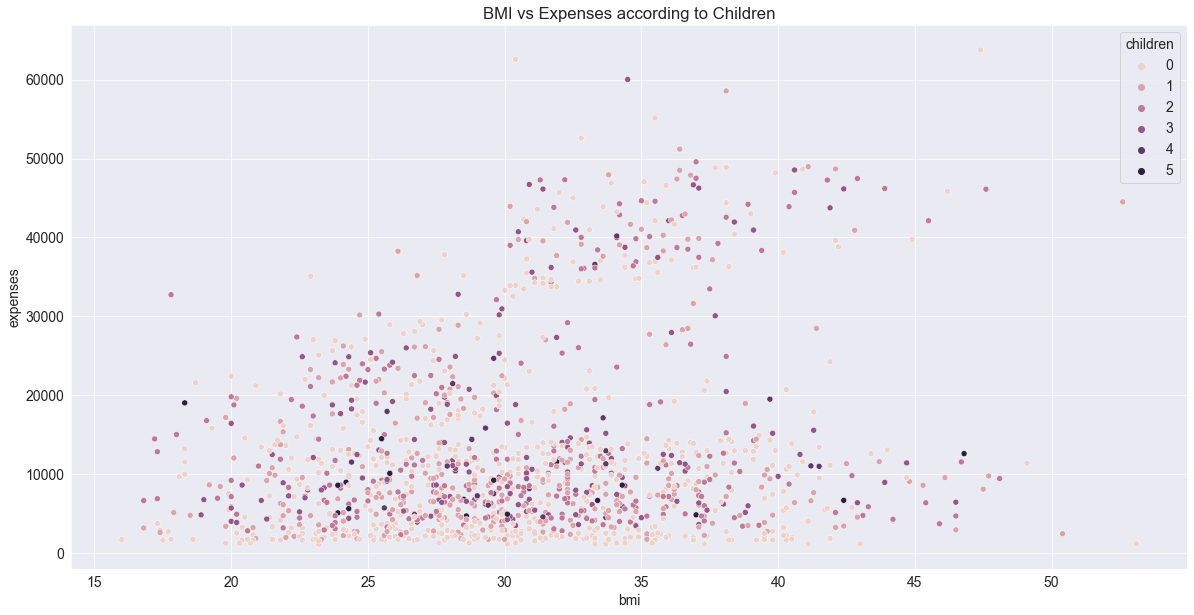

In [63]:
sns.scatterplot(x = 'bmi', y = 'expenses', hue = 'children', data = train_df).set(title = 'BMI vs Expenses according to Children');

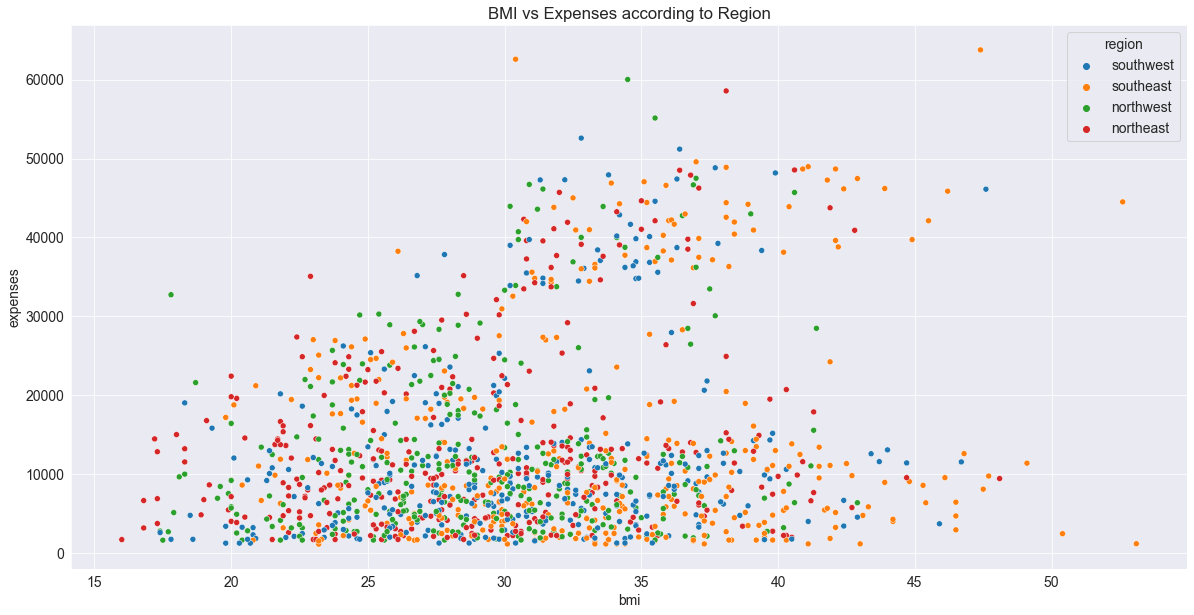

In [64]:
sns.scatterplot(x = 'bmi', y = 'expenses', hue = 'region', data = train_df).set(title = 'BMI vs Expenses according to Region');

In [65]:
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [66]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])

In [68]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols

c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [69]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])
train_df.drop(columns=categorical_cols,axis = 1, inplace = True)
train_df

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.9,0,2205.98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.9,0,1629.83,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.8,0,2007.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [70]:
train_df.drop_duplicates(inplace = True)

In [71]:

X = train_df.drop('expenses',axis = 1)


y = train_df.expenses
X.shape,y.shape

((1337, 11), (1337,))

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.20)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25)
X_train.shape,y_train.shape

((801, 11), (801,))

In [73]:
X_val.shape,y_val.shape

((268, 11), (268,))

In [74]:
X_test.shape,y_test.shape

((268, 11), (268,))

In [75]:
# importing the KNN model
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform',leaf_size = 30) 

In [76]:
Knn.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
train_pred = Knn.predict(X_train)
validation_pred = Knn.predict(X_val)

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_pred)

5511.856911360799

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_pred)

73108550.25833227

In [80]:
np.sqrt(mean_squared_error(y_train,train_pred))

8550.353808956228

In [81]:
# for training data
np.sqrt(mean_squared_error(y_train,train_pred))

8550.353808956228

In [82]:
# for validation data
np.sqrt(mean_squared_error(y_val,validation_pred))

9813.48987896474

In [83]:
# tuning the n_neighbours Hyperparameter


# by default n_neighbors or k == 5
training_errors = []
validation_errors = []

for i in range(1,30):
  Knn = KNeighborsRegressor(n_neighbors = i,weights = 'uniform',leaf_size = 30, n_jobs = -1)
  Knn.fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

In [84]:
print('When n_neighbors = '+str(training_errors.index(min(training_errors))+1)+" ,the minimum RMSE training error = "+str(min(training_errors)))


When n_neighbors = 1 ,the minimum RMSE training error = 0.0


In [85]:
print('When n_neighbors = '+str(validation_errors.index(min(validation_errors))+1)+" ,the minimum RMSE validation error = "+str(min(validation_errors)))

When n_neighbors = 5 ,the minimum RMSE validation error = 9813.48987896474


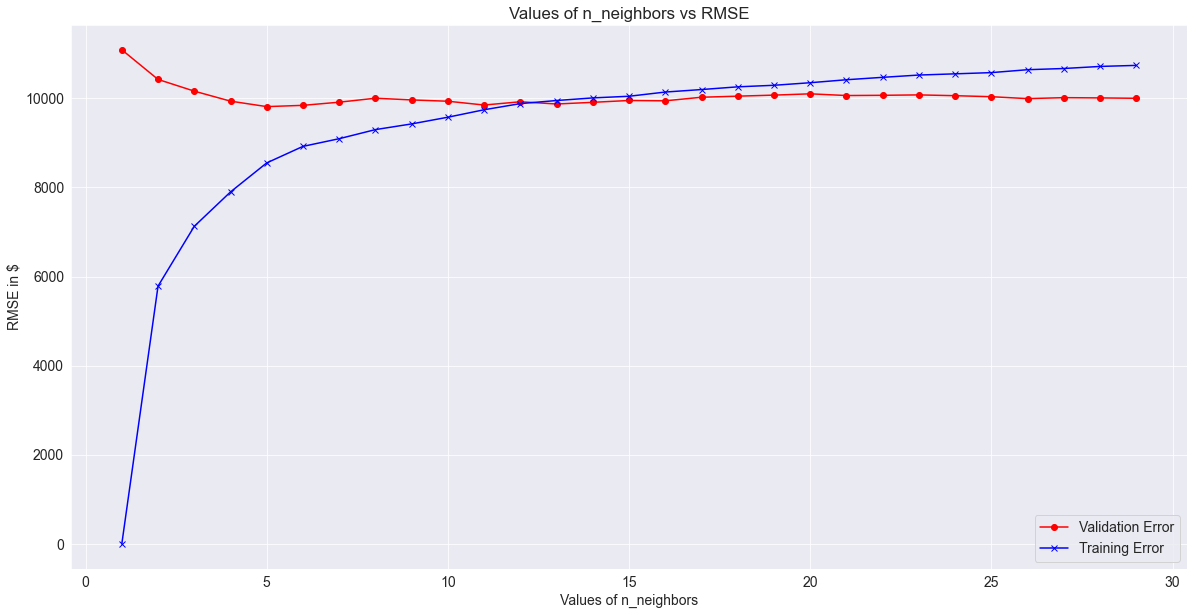

In [86]:
# Plotting in graph: Values of n_neighbors vs RMSE Error
plt.plot(range(1,30),validation_errors, color = 'red', marker = 'o')
plt.plot(range(1,30), training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of n_neighbors')
plt.ylabel('RMSE in $')
plt.title('Values of n_neighbors vs RMSE')
plt.legend(['Validation Error','Training Error']);

In [87]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

In [88]:
Knn = KNeighborsRegressor(n_neighbors = 11,weights = 'uniform',leaf_size = 30, n_jobs = -1)
Knn.fit(X_train,y_train)

Knn1 = KNeighborsRegressor(n_neighbors = 11,weights = 'distance',leaf_size = 30, n_jobs = -1).fit(X_train,y_train)
dict1 = {'Models':['Tuned Validation Error','Tuned Training Error','Untuned Validation Error','Untuned Training Error'],'Error':[np.sqrt(mean_squared_error(y_val,Knn1.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn1.predict(X_train))),np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn.predict(X_train)))]}
tuned_df = pd.DataFrame(dict1) #.reset_index()
tuned_df['Bool'] = [True,False,True,False]
tuned_df

,Models,Error,Bool
0,Tuned Validation Error,9644.740912,True
1,Tuned Training Error,0.000000,False
2,Untuned Validation Error,9848.917888,True
3,Untuned Training Error,9743.133436,False


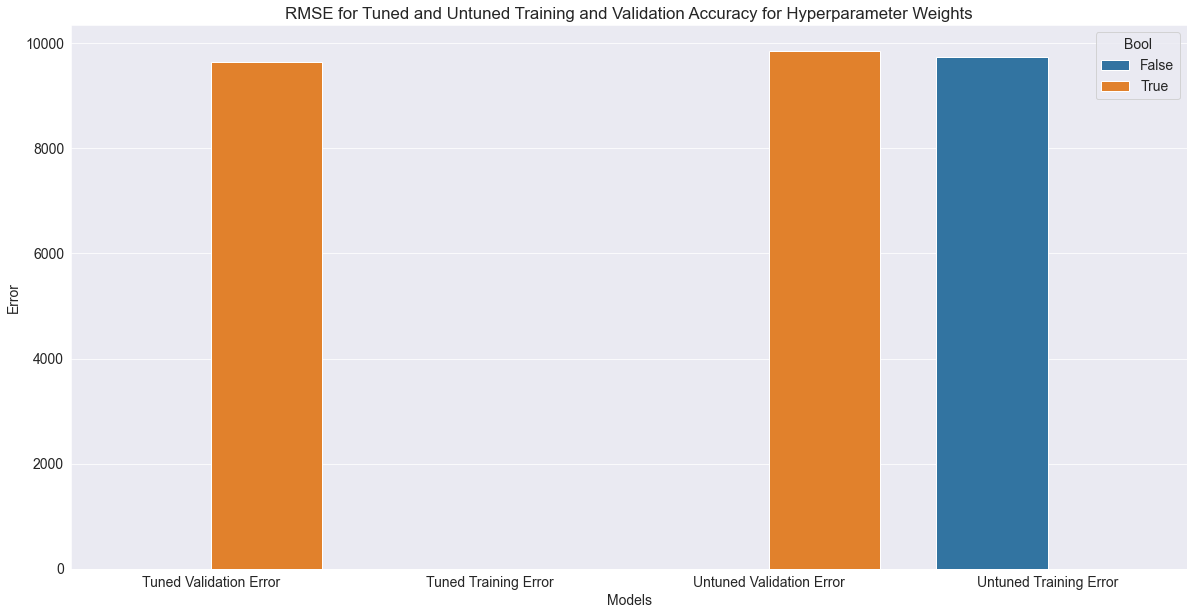

In [89]:
sns.barplot(x = 'Models', y ='Error', data = tuned_df, hue = 'Bool').set(title = 'RMSE for Tuned and Untuned Training and Validation Accuracy for Hyperparameter Weights');


In [90]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

In [91]:
# Tuning leaf size hyperparameter
leaf_size_values = [5,10] + list(range(25,325,25))

training_errors = []
validation_errors = []

for i in leaf_size_values:
  Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = i).fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

In [92]:
print('When leaf_size = '+str(leaf_size_values[(training_errors.index(min(training_errors))+1)])+" ,the minimum RMSE training error = "+str(min(training_errors)))


When leaf_size = 250 ,the minimum RMSE training error = 9728.111829639474


In [93]:
print('When leaf_size = '+str(leaf_size_values[(validation_errors.index(min(validation_errors))+1)])+" ,the minimum RMSE Validation error = "+str(min(validation_errors)))


When leaf_size = 250 ,the minimum RMSE Validation error = 9805.559503146698


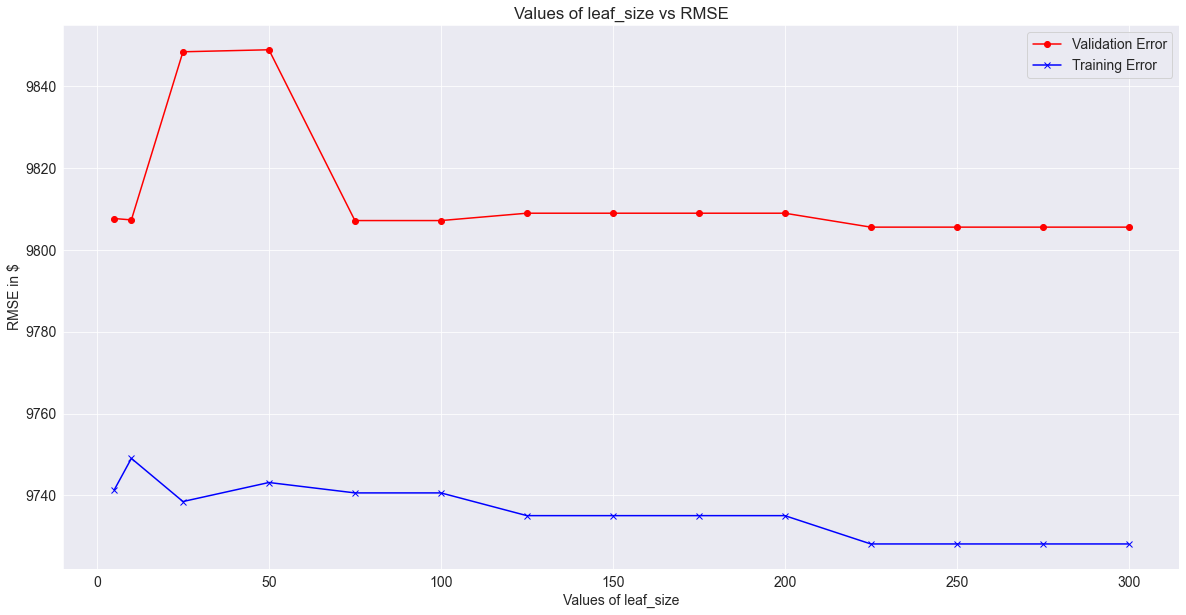

In [94]:
plt.plot(leaf_size_values,validation_errors, color = 'red', marker = 'o')
plt.plot(leaf_size_values, training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of leaf_size')
plt.ylabel('RMSE in $')
plt.title('Values of leaf_size vs RMSE')
plt.legend(['Validation Error','Training Error']);

In [95]:
# Best Optimized Knn Regrssor Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 10).fit(X_train,y_train)

In [96]:
test_pred = Knn.predict(X_test)
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  12157.4507927574


In [97]:
print("The RMSE calculated is very high, meaning that our model has performed very poorly on the testing data. Thus, we will train our model using other regression models to achieve better accuracy and reduce loss/error.")

The RMSE calculated is very high, meaning that our model has performed very poorly on the testing data. Thus, we will train our model using other regression models to achieve better accuracy and reduce loss/error.


In [98]:
# training our default linear regression model
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)


c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [99]:
# Making Predictions on validation data
validation_pred = log_reg.predict(X_val)
log_reg.coef_

array([   242.88560661,    310.66180256,    509.98276209,     32.97991005,
          -32.97991005, -11600.37858727,  11600.37858727,    497.27588642,
         -154.35867157,   -279.17340048,    -63.74381437])

In [100]:
log_reg.intercept_

325.4482173545566

In [101]:
log_reg.normalize

False

In [102]:

log_reg.fit_intercept

True

In [104]:
# RMSE For Training Predictions
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
rmse_train

8550.353808956228

In [105]:

# RMSE for Validation Predictions
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

5805.251807463786

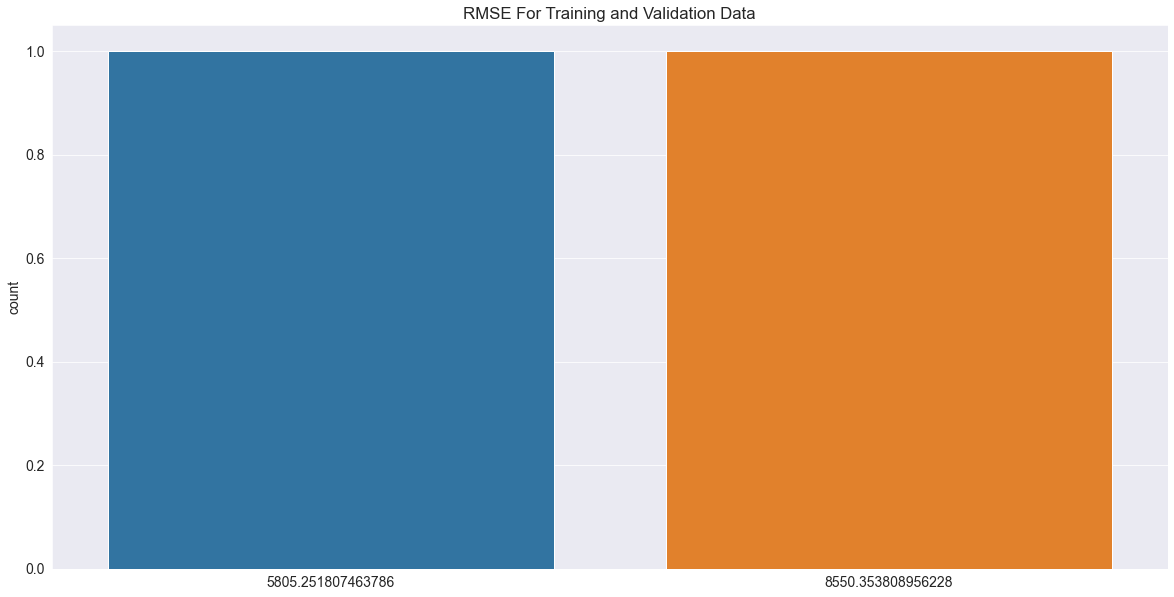

In [106]:
sns.countplot(x = [rmse_train,rmse_val]).set(title = 'RMSE For Training and Validation Data');

In [107]:
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))
# when normalize = True
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = True).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2],
    'Bool':[0,0,1,1]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_bas

,Models,Values,Bool
0,rmse_train1,6174.963934,0
1,rmse_train2,6178.739712,0
2,rmse_val1,5805.251807,1
3,rmse_val2,5796.959974,1


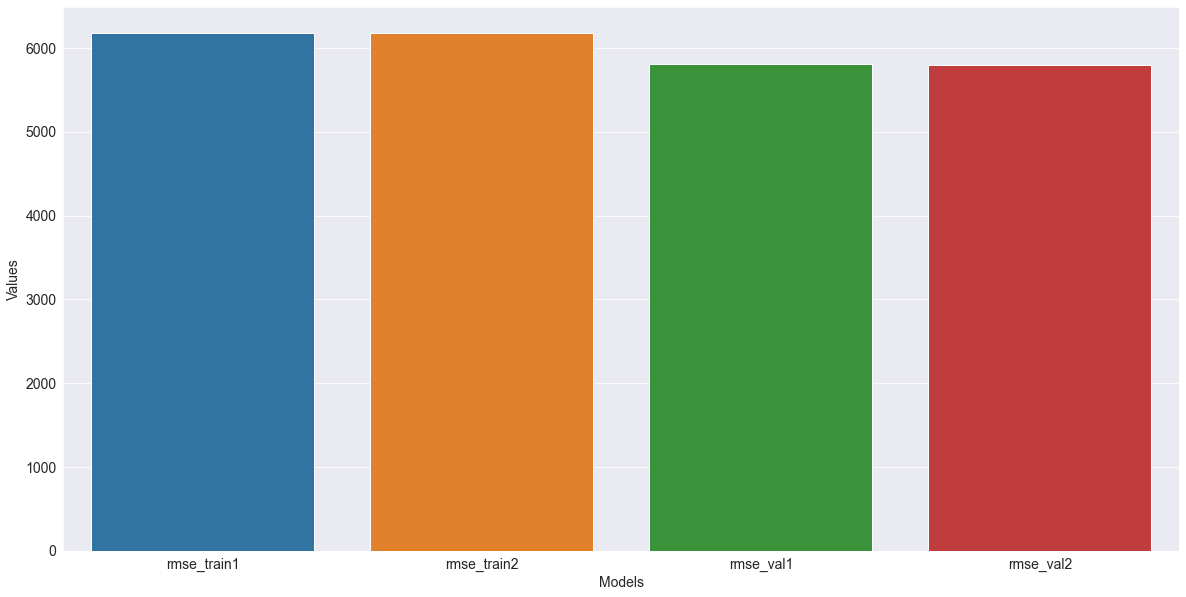

In [108]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

In [109]:
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))
# when fit_intercept = False
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = False).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the 

,Models,Values
0,rmse_train1,6174.963934
1,rmse_train2,6174.963934
2,rmse_val1,5805.251807
3,rmse_val2,5805.251807


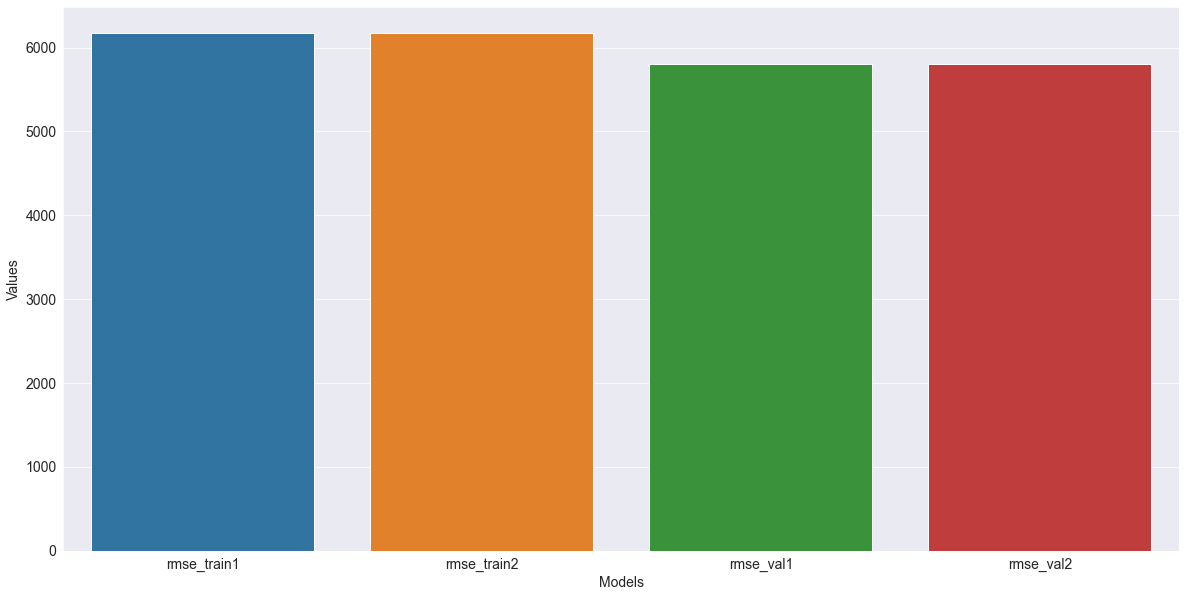

In [110]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

In [111]:
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)
test_pred = log_reg.predict(X_test)
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  5975.455615804546


c:\users\91886\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [112]:
print('This model is significantly better than Knn Model, as Knn Model has significantly higher RMSE on testing data.')

This model is significantly better than Knn Model, as Knn Model has significantly higher RMSE on testing data.
